In [1]:
import sys
sys.path.append('..')
import ugent

import matplotlib.pyplot as plt
import matplotlib as mpl

In [177]:
from pyslise import Pyslise
from math import pi, cos

V = lambda x: 100*cos(x)**2

problem = Pyslise(V, 0, pi, tolerance=1e-15)
print(problem.eigenvaluesByIndex(0, 50, (0, 1), (0, 1)))

[(0, 9.743221015315829), (1, 28.685139377750147), (2, 46.47905847337863), (3, 62.98648995274247), (4, 78.06276589945435), (5, 91.80107129181059), (6, 105.00295715083419), (7, 119.05798835128618), (8, 135.02335650490505), (9, 153.22568004237348), (10, 173.64271366714854), (11, 196.20767464745808), (12, 220.87371009659708), (13, 247.61116491565087), (14, 276.40072004388253), (15, 307.22928486250134), (16, 340.08769166191325), (17, 374.96934450861534), (18, 411.8693895719208), (19, 450.78418556938664), (20, 491.71095482175804), (21, 534.6475470629906), (22, 579.5922758429774), (23, 626.543802911082), (24, 675.5010550454726), (25, 726.4631632684107), (26, 779.4294177852472), (27, 834.3992341462074), (28, 891.3721275354757), (29, 950.347693024116), (30, 1011.3255902524647), (31, 1074.3055314391493), (32, 1139.2872719142365), (33, 1206.2706025859136), (34, 1275.2553439014448), (35, 1346.2413409725195), (36, 1419.2284596149536), (37, 1494.2165831116292), (38, 1571.2056095513985), (39, 1650.19

In [5]:
from pyslise import Pyslise
from math import exp, pi, cos
import numpy as np

V = lambda x: 100*cos(x)**2
a = 0
b = pi
N = 50

slp = Pyslise(V, a, b, tolerance=1e-15)
exact = np.array(list(zip(*slp.eigenvaluesByIndex(0, N, (0, 1), (0, 1))))[1])
exact

array([   9.74322102,   28.68513938,   46.47905847,   62.98648995,
         78.0627659 ,   91.80107129,  105.00295715,  119.05798835,
        135.0233565 ,  153.22568004,  173.64271367,  196.20767465,
        220.8737101 ,  247.61116492,  276.40072004,  307.22928486,
        340.08769166,  374.96934451,  411.86938957,  450.78418557,
        491.71095482,  534.64754706,  579.59227584,  626.54380291,
        675.50105505,  726.46316327,  779.42941779,  834.39923415,
        891.37212754,  950.34769302, 1011.32559025, 1074.30553144,
       1139.28727191, 1206.27060259, 1275.2553439 , 1346.24134097,
       1419.22845961, 1494.21658311, 1571.20560955, 1650.19544963,
       1731.18602482, 1814.17726585, 1899.16911143, 1986.16150716,
       2075.15440462, 2166.14776061, 2259.14153648, 2354.13569758,
       2451.13021276, 2550.12505394])

In [169]:
from collections import defaultdict

errors_by_sector_count = defaultdict(list)

for k in np.linspace(10, 30, 100):
    p = Pyslise(V, a, b, tolerance=2**-k)
    errors = np.abs(np.array(p.eigenvaluesByIndex(0, N, (0, 1), (0, 1)))[:,1] - exact)/np.abs(exact)
    errors_by_sector_count[p.__sectorCount].append(errors)

In [183]:
2**-30*1.1

1.0244548320770264e-09

In [182]:
10**-9 

1e-09

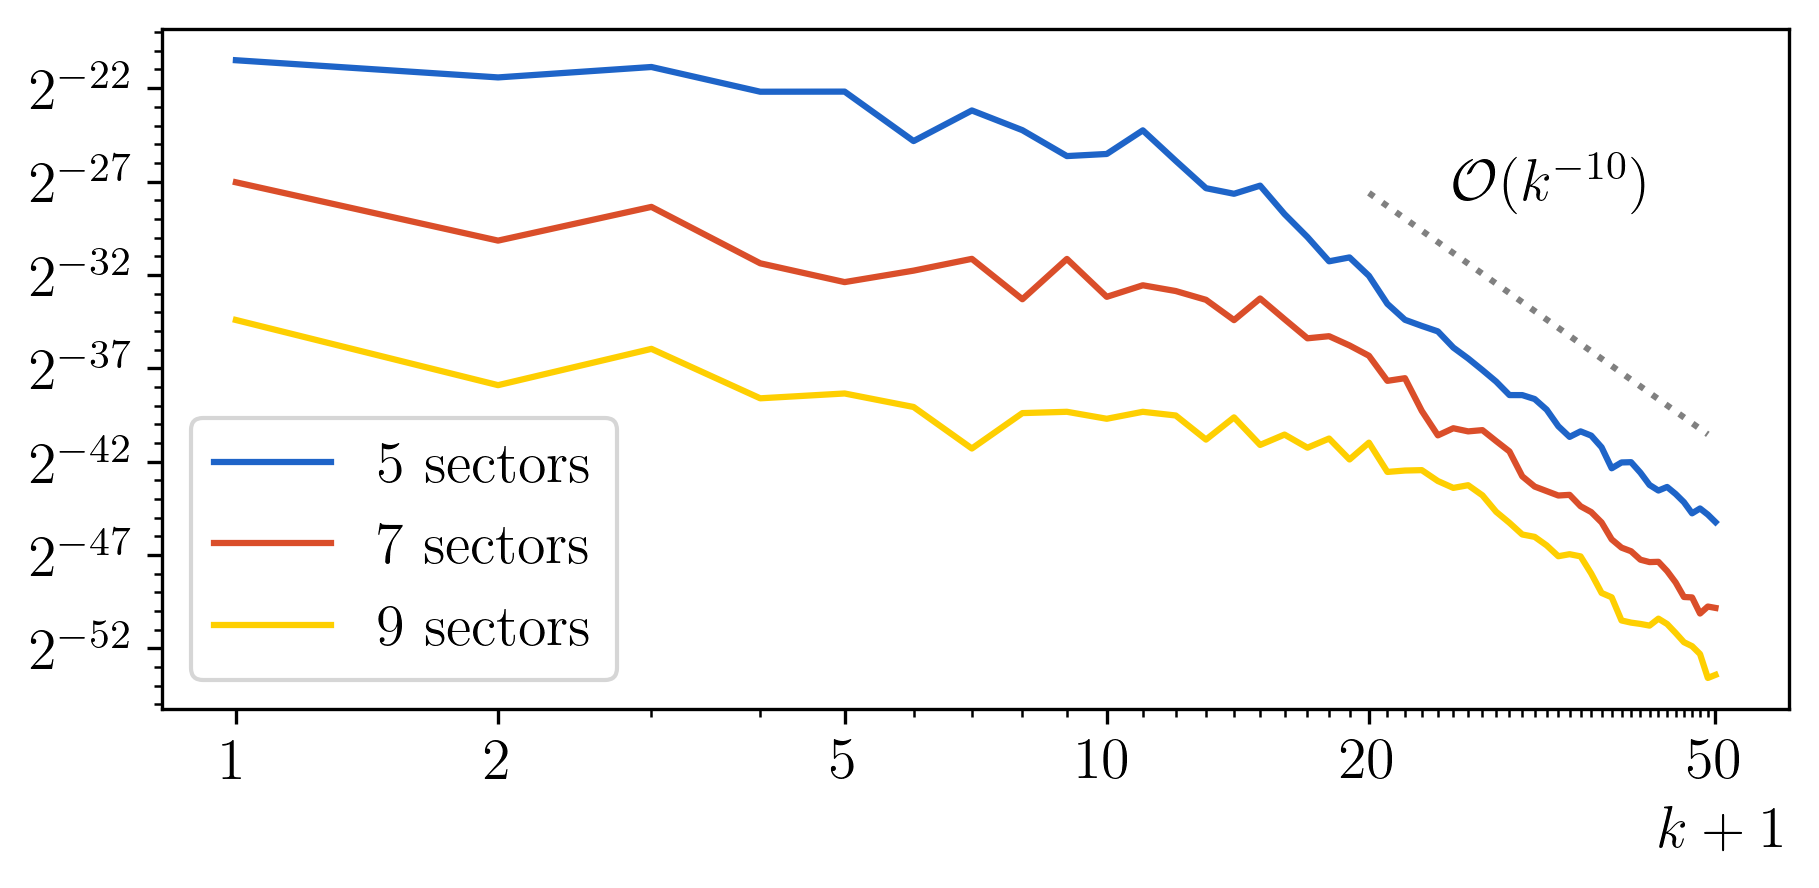

In [174]:
from matplotlib.path import Path
from matplotlib.patches import PathPatch

fig, ax = plt.subplots(1, 1, figsize=(7, 3), dpi=300)

ns = np.array(range(N))+1

ax.set_xscale('log', base=10)
ax.set_yscale('log', base=2)

ax.xaxis.set_major_locator(FixedLocator([1, 2, 5, 10, 20, 50]))
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_minor_locator(FixedLocator(ns))
ax.xaxis.set_minor_formatter(FormatStrFormatter(""))

ax.yaxis.set_major_locator(FixedLocator([2**-i for i in range(-3, 60, 5)]))
ax.yaxis.set_minor_locator(FixedLocator([2**-i for i in range(1, 60, 1)]))
ax.yaxis.set_minor_formatter(FormatStrFormatter(""))


xs = np.array(range(20, 50), dtype=float)
ax.plot(xs, xs**-10 * 50000, c="gray", ls=':')
ax.text(25, 2**-28, "$\\mathcal{O}(k^{-10})$")

for c, sc in zip(ugent.palet, [5, 7, 9]):
    ebsc = np.array(errors_by_sector_count[sc])
    avg_error = np.mean(ebsc, axis=0)
    ax.plot(ns, avg_error, c=c, label=f"${sc}$ sectors")

ax.legend(loc="lower left")
ax.set_xlabel('$k + 1$', loc='right')
plt.savefig('matslise_k_error.pdf', bbox_inches="tight")
plt.show()

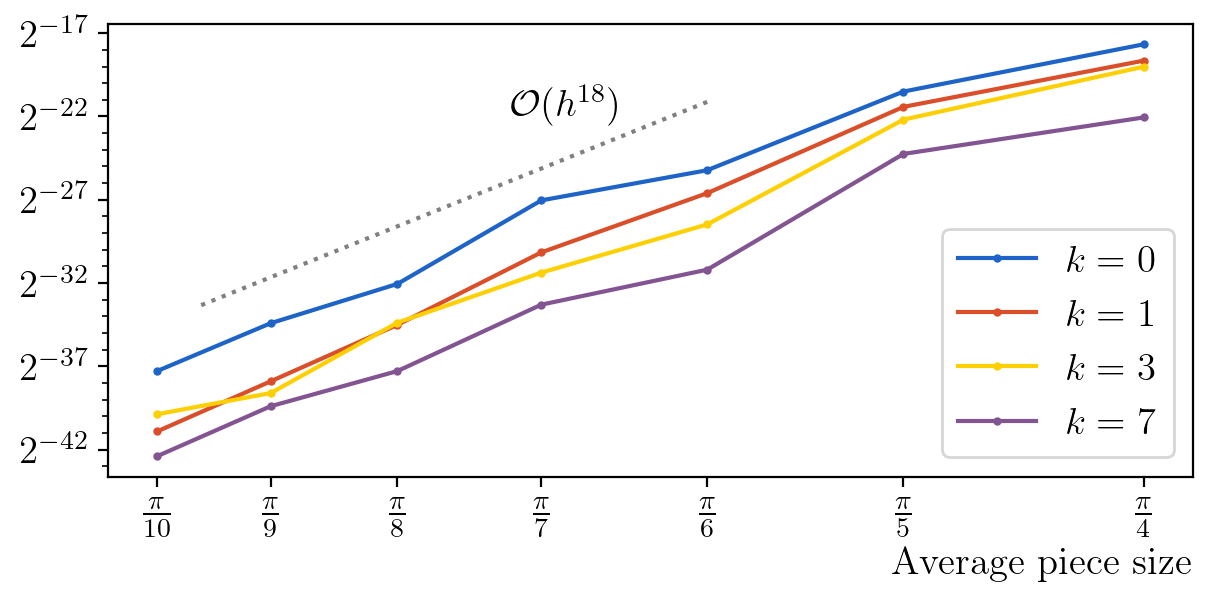

In [173]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FormatStrFormatter, ScalarFormatter

mpl.rc('text', usetex=True)
mpl.rc('text.latex', preamble=r'\usepackage{amsmath}')
mpl.rc('font', family='serif', size=14, serif="Computer Modern Roman")

fig, ax = plt.subplots(figsize=(7, 3), dpi=200)

keys = sorted(errors_by_sector_count.keys())

ax.set_xscale('log', base=2)
ax.set_yscale('log', base=2)
ax.set_xticks([pi/k for  k in keys])
ax.set_xticklabels([f"$\\frac{{\\pi}}{{{k}}}$" for  k in keys])
# ax.xaxis.set_major_formatter(ScalarFormatter())
# ax.xaxis.set_minor_formatter(FormatStrFormatter(""))
# ax.xaxis.set_minor_locator(FixedLocator([2**-i for i in range(1, 30, 1)]))

ax.yaxis.set_major_locator(FixedLocator([2**-i for i in range(-3, 60, 5)]))
ax.yaxis.set_minor_locator(FixedLocator([2**-i for i in range(1, 60, 1)]))
ax.yaxis.set_minor_formatter(FormatStrFormatter(""))


steps = pi/np.array(keys)

ns = np.linspace(pi/9.6, pi/6, 100)
ax.plot(ns, ns**18 * 0.05, c="gray", ls=':')
ax.text(pi/7.2, 2**-22, "$\\mathcal{O}(h^{18})$")


for c, k in zip(ugent.palet, [0, 1, 3, 7]):    
    errors = [np.mean(np.array(errors_by_sector_count[sc])[:, k]) for sc in keys]
    ax.plot(steps, errors, label=f"$k = {k}$", c=c, marker='.', ms=4)
ax.legend(loc='lower right')
ax.set_xlabel('Average piece size', loc='right')

plt.savefig('matslise_h_error.pdf', bbox_inches="tight")
plt.show()